<div style="display:flex; justify-content:flex-end; align-items:center; gap:12px;">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_QE36kR-JtQcZMteOxCgOglStNLOx8u1ufg&s" style="height:64px; width:auto;">
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" width="64">
    <img src="https://raw.githubusercontent.com/edipocremon/th/refs/heads/main/fig/topodata-logo.png" width="64">
</div>

# <span style="color:#336699">Acesso e visualização de dados TOPODATA com Python e STAC</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/Python/stac/stac-image-processing.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Édipo H. Cremon <sup><a href="https://orcid.org/0000-0003-3174-7273"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>,Márcio de M. Valeriano <sup><a href="https://orcid.org/0000-0002-1985-9005"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>,Rennan Marujo<sup><a href="https://orcid.org/0000-0002-0082-9498"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto R. Queiroz<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Divisão de Observação da Terra e Geoinformática, Instituto Nacional de Pesquisas Espaciais (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brasil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: Fev 27, 2026
</div>

<br/>

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;">
<b>Abstract.</b> > Este Jupyter Notebook apresenta um fluxo de trabalho para acesso aos dados geomorfométricos do projeto TOPODATA por meio do serviço STAC da Base de Informações Georreferenciadas (BIG/INPE). São demonstrados exemplos práticos utilizando bibliotecas Python para consultar os dados, mosaicar tiles raster, realizar recortes espaciais com base em dados vetoriais e visualizar variáveis geomorfométricas derivadas de modelos digitais de elevação. Os produtos TOPODATA são compatíveis com aplicações cartográficas e análises ambientais em escalas de até 1:100.000, sendo adequados para estudos regionais de relevo e planejamento territorial. O material foi preparado como apoio à palestra <em>“TOPODATA - Acesso ao Banco de Dados Geomorfométricos do Brasil com Python e QGIS”</em>, oferecendo um roteiro inicial para uso dos dados em análises de relevo, planejamento territorial e aplicações ambientais.
</div>

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>For an introduction to the SpatioTemporal Asset Catalog (STAC) with the <em>Brazil Data Cube</em> infrastructure, please, refer to the following Jupyter Notebook:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Zaglia, M.; Marujo, R.; Queiroz, G. R.; Carlos, F. M. <a href="./stac-introduction.ipynb" target="_blank">Introduction to the SpatioTemporal Asset Catalog (STAC)</a>.
    </div>
</div>


<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac.png?raw=true" align="right" width="66"/>

# API Cliente STAC
<hr style="border:1px solid #0077b9;">

Para executar os exemplos apresentados neste Jupyter Notebook será necessário instalar o cliente STAC para Python, utilizado para acessar os dados TOPODATA disponibilizados na Base de Informações Georreferenciadas (BIG/INPE). Para instalar o pacote a partir do PyPI utilizando o <code>pip</code>, utilize o seguinte comando:

In [1]:
!pip install pystac-client

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Instala as bibliotecas necessárias para o processamento dos dados TOPODATA.
# - rasterio: leitura e manipulação de dados raster (ex: elevação, declividade).
# - shapely: operações geométricas com áreas e limites espaciais.
# - seaborn: criação de gráficos e visualizações dos dados.
!pip install rasterio shapely seaborn

Defaulting to user installation because normal site-packages is not writeable


Para acessar as funcionalidades da API cliente STAC, é necessário importar o pacote `pystac_client`, conforme apresentado a seguir:

In [3]:
import pystac_client

Em seguida, você pode verificar a versão instalada do pacote `pystac_client`:

In [4]:
pystac_client.__version__

'0.9.0'

Em seguida, crie um objeto `pystac_client.Client` conectado ao serviço STAC da Base de Informações Georreferenciadas (BIG/INPE):

In [5]:
service = pystac_client.Client.open('https://data.inpe.br/bdc/stac/v1/')

# Busca pelas Quadrículas (Tiles) Geomorfométricos do TOPODATA
<hr style="border:1px solid #0077b9;">


Neste exemplo, utilizaremos a API `search` do STAC para recuperar tiles raster geomorfométricos do TOPODATA a partir da coleção `topodata-1`. Diferentemente de cubos de imagens ópticas, o TOPODATA é um conjunto de dados estático do relevo, derivado do SRTM, em que cada item STAC representa um tile espacial individual contendo variáveis geomorfométricas (por exemplo, altitude, declividade e curvaturas).

A busca será realizada utilizando um retângulo envolvente (bounding box) definido pelos seguintes limites:
$x_{min} = -38.35$, $x_{max} = -35.00$, $y_{min} = -10.55$, $y_{max} = -8.75$, correspondente a uma área que abrange o estado de Alagoas.
Como o TOPODATA não é um conjunto de dados temporal, nenhum filtro de data será aplicado à consulta.



In [6]:
bbox = (-38.35, -10.55, -35, -8.75)

In [7]:
# Realiza a busca no catálogo STAC do INPE pela coleção "topodata-1".
# O parâmetro 'bbox' define a área de interesse (bounding box),
# retornando apenas os tiles TOPODATA que intersectam essa região.
item_search = service.search(collections=['topodata-1'],
                             bbox=bbox)

A consulta acima deve retornar 8 itens STAC correspondentes aos tiles do TOPODATA que intersectam a extensão espacial solicitada.

In [8]:
item_search
item_search.matched()

8

Este bloco cria uma visualização mostrando a posição dos tiles TOPODATA encontrados. Para cada item retornado pelo STAC, o script desenha o contorno (footprint) do tile e escreve o nome do arquivo no centro aproximado. Isso ajuda a visualizar quais áreas serão usadas no processamento antes de baixar ou mosaicar os dados.

In [9]:
# Executa uma nova busca no catálogo STAC do TOPODATA dentro da área definida (bbox).
# O parâmetro max_items aumenta o limite de resultados para garantir que todos os
# tiles do envelope sejam retornados. Em seguida, os itens são convertidos para uma
# lista e algumas informações básicas são exibidas: quantidade de tiles encontrados,
# exemplo de identificação de um item e os tipos de dados (assets) disponíveis.
search = service.search(
    collections=["topodata-1"],
    bbox=bbox,
    max_items=1000  # pra garantir que pega tudo no envelope
)
items = list(search.items())
print("Itens encontrados:", len(items))
print("Exemplo de item:", items[0].id)
print("Assets do item:", list(items[0].assets.keys()))

Itens encontrados: 8
Exemplo de item: 08S36_
Assets do item: ['DD', 'FT', 'H3', 'H5', 'HN', 'OC', 'ON', 'RS', 'SA', 'SB', 'SC', 'SN', 'V3', 'V5', 'VN', 'ZN', 'thumbnail']


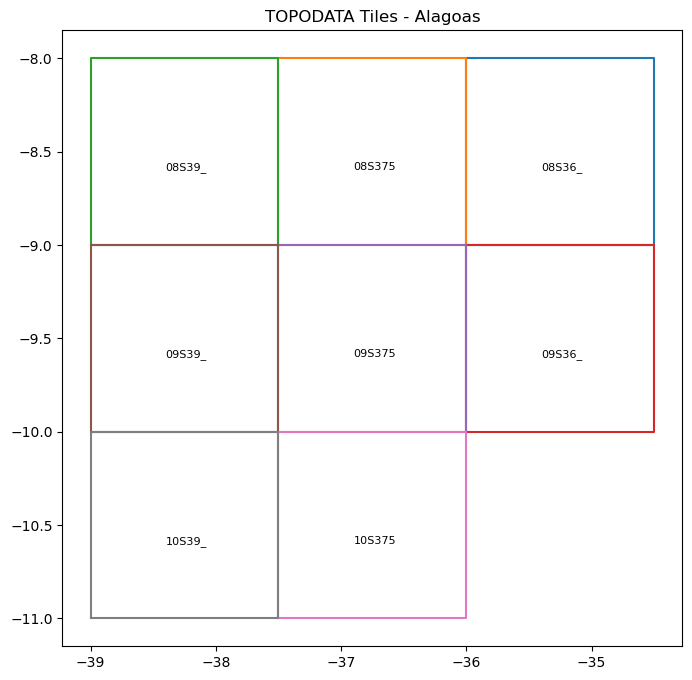

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

for item in items:
    geom = item.geometry
    
    # pegar coordenadas do polígono
    xs = [c[0] for c in geom["coordinates"][0]]
    ys = [c[1] for c in geom["coordinates"][0]]
    
    # desenhar footprint
    ax.plot(xs, ys)
    
    # calcular centro aproximado
    cx = sum(xs) / len(xs)
    cy = sum(ys) / len(ys)
    
    # plotar nome do item
    ax.text(cx, cy, item.id, fontsize=8)

ax.set_title("TOPODATA Tiles - Alagoas")
plt.show()

# Mosaico de Quadrículas (Tiles) do TOPODATA
<hr style="border:1px solid #0077b9;">


Os dados do TOPODATA são distribuídos na forma de tiles espaciais individuais. 
Para realizar análises em escala regional, os tiles que intersectam a área de interesse devem ser integrados em um único raster contínuo por meio de um mosaico.

Nesta etapa, realizamos a junção de todos os tiles do TOPODATA retornados pela busca STAC em um único conjunto raster para cada variável geomorfométrica.


In [11]:
# Função para criar um mosaico raster a partir de vários tiles TOPODATA.
# A função recebe a lista de itens retornados pelo STAC, seleciona um tipo
# específico de dado (asset_key, como elevação ou declividade), baixa os rasters,
# junta todos em um único mosaico dentro da área definida (bbox_wsen) e salva
# o resultado como um arquivo GeoTIFF. Ao final, os arquivos abertos são fechados
# para evitar problemas de memória.

def mosaic_asset(items, asset_key, bbox_wsen, out_tif):
    hrefs = []
    for it in items:
        if asset_key in it.assets:
            hrefs.append(it.assets[asset_key].href)

    if not hrefs:
        raise ValueError(f"Nenhum asset '{asset_key}' encontrado nos itens.")

    srcs = [rasterio.open(h) for h in hrefs]
    try:
        # bounds usa (W, S, E, N) no CRS do dataset (TOPODATA normalmente em EPSG:4326)
        mosaic, out_transform = merge(srcs, bounds=bbox_wsen)

        out_meta = srcs[0].meta.copy()
        out_meta.update({
            "driver": "GTiff",
            "height": mosaic.shape[1],
            "width": mosaic.shape[2],
            "transform": out_transform,
            "count": mosaic.shape[0],
        })

        with rasterio.open(out_tif, "w", **out_meta) as dest:
            dest.write(mosaic)

        print(f"OK: {asset_key} -> {out_tif}")

    finally:
        for s in srcs:
            s.close()

In [12]:
# Importa funções do Rasterio para ler arquivos raster e juntar vários tiles em um mosaico.
# Aqui selecionamos apenas o asset "ZN" (ex.: variável de altitude/elevação do TOPODATA),
# abrimos todos os tiles encontrados e usamos o merge() para combiná-los em um único raster
# contínuo (mosaico) em memória. O parâmetro nodata=-9999 define o valor usado para
# representar áreas sem dado no mosaico.
import rasterio
from rasterio.merge import merge
# pegar apenas os assets ZN
zn_files = [item.assets["ZN"].href for item in items]

# abrir rasters
srcs = [rasterio.open(f) for f in zn_files]

# criar mosaico em memória
mosaic, out_trans = merge(srcs, nodata=-9999)

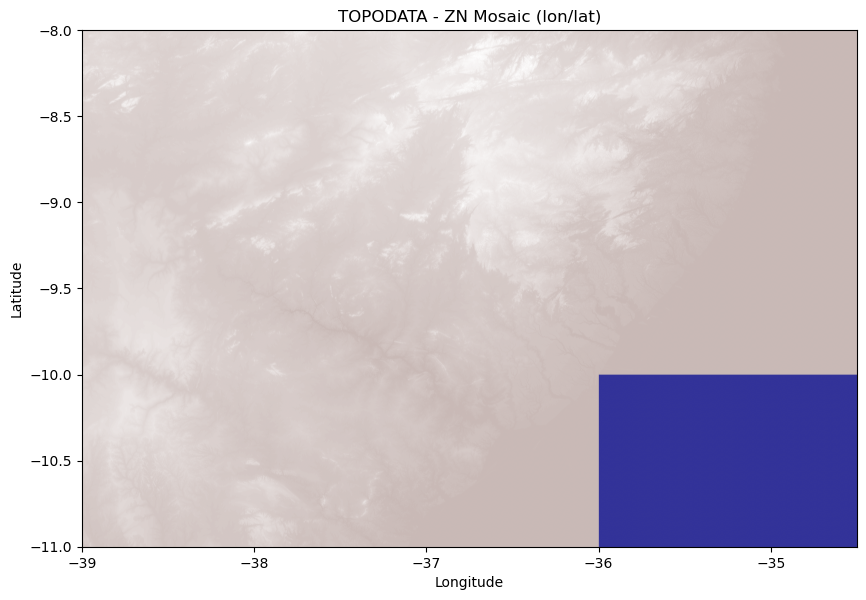

In [13]:
# Esta parte cria uma visualização rápida do mosaico TOPODATA gerado.
# A função show() exibe o raster usando as coordenadas geográficas (lon/lat),
# aplicando uma escala de cores para facilitar a interpretação do relevo.
# O gráfico final ajuda a conferir se o mosaico foi montado corretamente
# antes de salvar ou continuar o processamento dos dados.
from rasterio.plot import show
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
show(mosaic[0], transform=out_trans, ax=ax, cmap="terrain")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("TOPODATA - ZN Mosaic (lon/lat)")

plt.show()

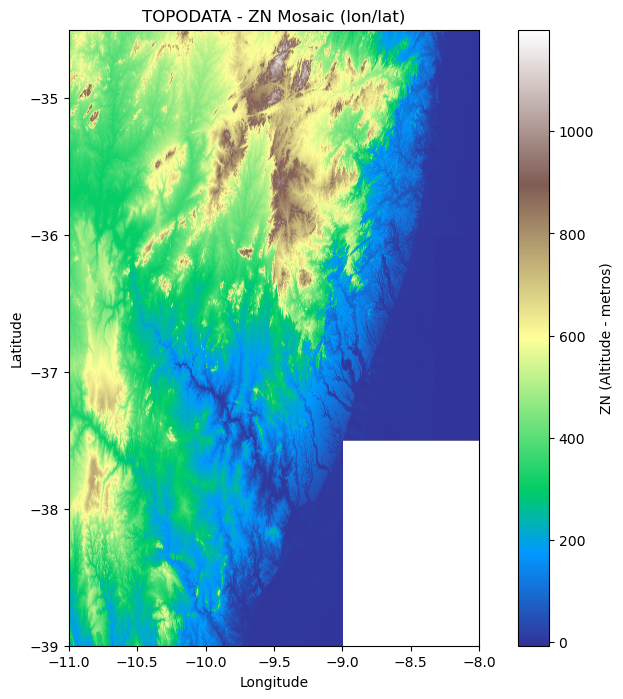

In [14]:
# Este bloco cria uma visualização mais personalizada do mosaico TOPODATA.
# Primeiro calculamos os limites geográficos do raster para posicionar corretamente
# a imagem em longitude/latitude. Em seguida, os valores nodata (-9999) são mascarados
# para não aparecerem no mapa. O mosaico é exibido em tons de cinza com uma barra
# de cores indicando os valores ZN.
import numpy as np
import matplotlib.pyplot as plt
from rasterio.transform import array_bounds

# calcular limites geográficos do raster
h, w = mosaic[0].shape
bottom, left, top, right = array_bounds(h, w, out_trans)
extent = (left, right, bottom, top)

# mascarar valores nodata (-9999) para não aparecerem no mapa
data = np.ma.masked_equal(mosaic[0], -9999)

fig, ax = plt.subplots(figsize=(10,8))

img = ax.imshow(
    data,              # usa o array mascarado
    cmap="terrain",
    extent=extent,
    origin="upper"
)

# legenda (colorbar)
cbar = plt.colorbar(img, ax=ax)
cbar.set_label("ZN (Altitude - metros)")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("TOPODATA - ZN Mosaic (lon/lat)")

plt.show()

# Recorte Espacial (Spatial Clipping)
<hr style="border:1px solid #0077b9;">

Após a geração do mosaico, o raster resultante ainda pode incluir áreas fora da região-alvo.
Assim, realizamos o recorte do mosaico utilizando o limite administrativo de uma área de interesse — para obter um conjunto de dados espacialmente consistente.


In [15]:
# Carrega o limite vetorial do estado de Alagoas usando GeoPandas.
# Neste exemplo, o arquivo é lido diretamente de uma URL (formato GeoPackage),
# mas também é possível usar um arquivo salvo localmente no computador.
import geopandas as gpd
url = "https://raw.githubusercontent.com/edipocremon/big/main/alagoas.gpkg"
mascara = gpd.read_file(url)
# poligono = r"C:/home/jovyan/Documents/BIG/alagoas.gpkg" #caso seu arquivo esteja em um diretório do seu computador
mascara = gpd.read_file(url)

In [16]:
# Prepara o recorte do mosaico usando um limite vetorial.
# Primeiro identificamos o sistema de coordenadas (CRS) do raster TOPODATA
# e depois reprojetamos o polígono (mascara) para o mesmo CRS, garantindo
# que o recorte espacial funcione corretamente.
import rasterio
from rasterio.io import MemoryFile
from rasterio.mask import mask

# CRS do mosaico (use o CRS do primeiro tile/topodata)
mosaic_crs = srcs[0].crs  # ex: EPSG:4326

# garantir que o polígono está no mesmo CRS do raster
mascara_clip = mascara.to_crs(mosaic_crs)



In [17]:
# Este bloco recorta o mosaico TOPODATA usando o polígono de Alagoas.
# Primeiro pegamos as geometrias do vetor no formato esperado pelo rasterio.mask.
# Depois montamos um "raster temporário" em memória (MemoryFile) com os metadados
# corretos (CRS, transformação, tamanho e valor nodata=-9999) e escrevemos o mosaico nele.
# Por fim, aplicamos a função mask() com crop=True para recortar o raster ao limite do
# polígono e gerar um novo raster (clipped) já mascarado, além da nova transformação.
# A última linha mostra o tamanho (shape) do raster recortado (bandas, linhas, colunas).

# geometrias no formato que o rasterio.mask espera
geoms = [geom for geom in mascara_clip.geometry if geom is not None]

# metadados do raster em memória
nodata_value = -9999

meta = srcs[0].meta.copy()
meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "count": mosaic.shape[0],
    "transform": out_trans,
    "crs": mosaic_crs,
    "nodata": nodata_value  
})

with MemoryFile() as memfile:
    with memfile.open(**meta) as dataset:
        dataset.write(mosaic)

        # crop=True recorta no bounding box do polígono e aplica máscara
        clipped, clipped_transform = mask(dataset, geoms, crop=True)

# clipped tem shape (bands, y, x)
clipped.shape


(1, 6078, 11109)

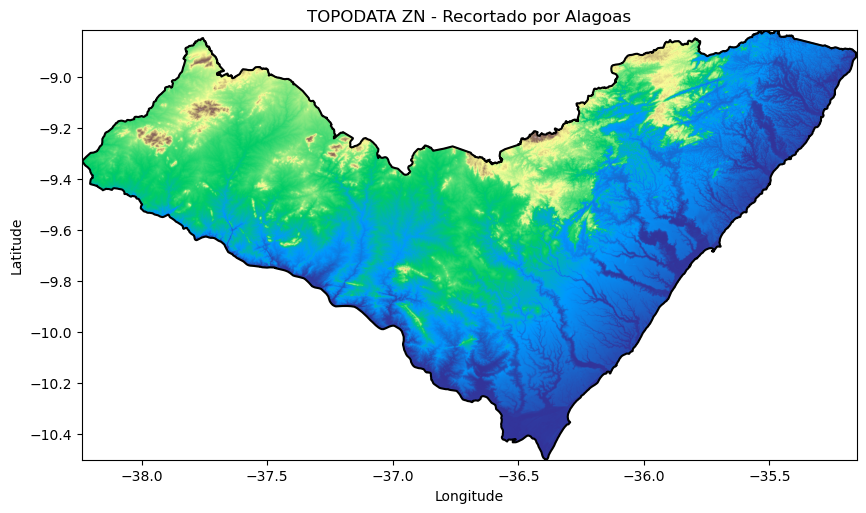

In [18]:
# Aqui é exibido o mosaico TOPODATA já recortado pelo limite de Alagoas.
# Os valores nodata (-9999) são mascarados para não aparecerem no mapa.
# O raster é plotado com cores de relevo (terrain) e o contorno do polígono
# é desenhado por cima para destacar a área utilizada no recorte.

import matplotlib.pyplot as plt
from rasterio.plot import show

fig, ax = plt.subplots(figsize=(10,8))

# mascarar nodata (-9999)
data = np.ma.masked_equal(clipped[0], -9999)

show(data, transform=clipped_transform, ax=ax, cmap="terrain", vmin=0,
    vmax=1000)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("TOPODATA ZN - Recortado por Alagoas")
mascara_clip.boundary.plot(ax=ax, color="black", linewidth=1.5)

plt.show()

Para testar diferentes gradiente de cores, confira em: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [19]:
# Exportar o raster recortado (clipped) para um arquivo GeoTIFF.
# Aqui usamos um caminho hipotético apenas como exemplo.
# Altere para uma pasta existente no seu computador ou ambiente.

#import rasterio

#out_raster = "C:/dados/topodata_ZN_alagoas_recortado.tif"  # exemplo de caminho local

# criar metadados do novo raster com base no original
#out_meta = srcs[0].meta.copy()
#out_meta.update({
#    "driver": "GTiff",
#    "height": clipped.shape[1],
#    "width": clipped.shape[2],
#    "transform": clipped_transform,
#    "count": clipped.shape[0],
#    "crs": mosaic_crs,
#    "nodata": -9999
#})

# salvar o arquivo
#with rasterio.open(out_raster, "w", **out_meta) as dest:
#    dest.write(clipped)

#print("Raster exportado para:", out_raster)

# Histograma
<hr style="border:1px solid #0077b9;">

O histograma de uma imagem digital, também conhecido como distribuição de frequência, é a representação gráfica em colunas que mostra a intensidade dos valores e o número de pixels com determinada intensidade, sendo a base para diversos tipos de processamento digital de imagens (Gonzalez & Woods, 2007).

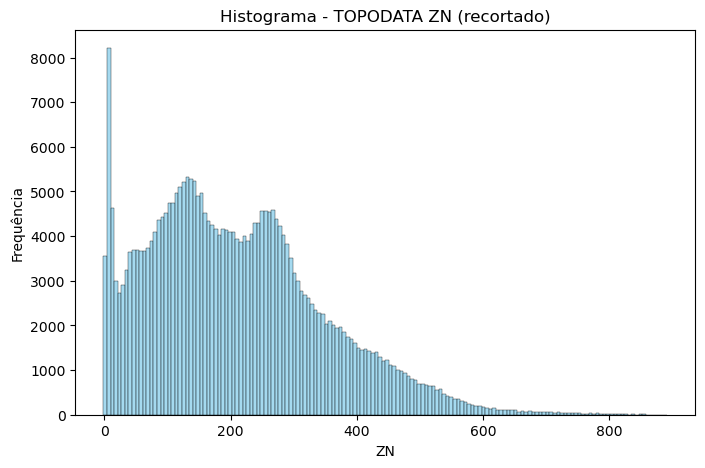

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# selecionar banda
band = clipped[0]

# transformar em vetor 1D
flat = band.ravel()

# remover nodata (-9999) e NaN
flat_clean = flat[(flat != -9999) & (~np.isnan(flat))]

plt.figure(figsize=(8,5))
sns.histplot(flat_clean[::100], kde=False, color="skyblue")

plt.xlabel("ZN")
plt.ylabel("Frequência")
plt.title("Histograma - TOPODATA ZN (recortado)")
plt.show()

# Referências
<hr style="border:1px solid #0077b9;">

- [Python Client Library for STAC Service](https://pystac-client.readthedocs.io/en/latest/)

- [Spatio Temporal Asset Catalog Specification](https://stacspec.org/)

# Veja também os seguintes Jupyter Notebooks
<hr style="border:1px solid #0077b9;">

* [Introduction to the SpatioTemporal Asset Catalog (STAC)](./stac-introduction.ipynb)